In [ ]:
'''
Luiz Soares Neto
ICAT/UFAL
luizsneto211@gmail.com
luiz.neto@icat.ufal.br
Last updated on april 02, 2025
'''

In [ ]:
######################################################## ANOTAÇÕES E AVISOS ######################################################## 

'''
A lógica aqui foi tentar verificar qual extensão os dados cobriam e ver onde a bacia se localizava.
O Pandas foi usado para ler os arquivos, o Matplotlib para gerar os gráficos e visualizar tudo, e o GeoPandas para 
transformar os dados em um formato geoespacial, criando os pontos e permitindo sobrepor a bacia no mapa.

###############################################################################################################

Caso as bibliotecas necessárias para a execução do script não estejam instaladas em sua máquina,
utilize os seguintes comandos para realizar a instalação:

pip install pandas
pip install geopandas
pip install matplotlib

'''

In [1]:
########################################### BIBLIOTECAS UTILIZADAS ###########################################

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 

CRS da bacia: EPSG:4326


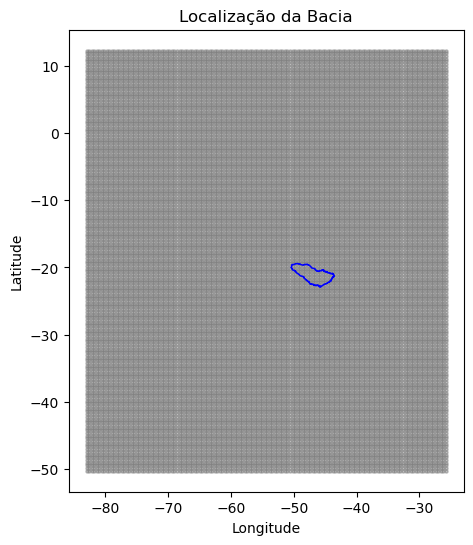

In [2]:
#### Verificando onde a bacia está em relação aos dados ####
#### Eu fiz essa etapa só pra ter uma noção das coordenadas da bacia ####

# Carregar a bacia
bacia = gpd.read_file("GRANDE.shp")

# Carregar os pontos apenas como DataFrame (sem converter para GeoDataFrame)
df = pd.read_csv("MERGE_20250315-20250319.dat", sep="\s+", names=["longitude", "latitude", "precipitacao"])

# Verificar CRS da bacia
print("CRS da bacia:", bacia.crs)

# Plotar os pontos do arquivo MERGE
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df["longitude"], df["latitude"], color='gray', s=5, alpha=0.5, label="Pontos gerais")

# Plotar a bacia por cima
bacia.plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=1, label="Bacia")

# Adicionei as legenda só pra ficar mais estético
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Localização da Bacia")
plt.show()

       longitude  latitude  precipitacao             geometry
12949      -50.2     -20.2           2.3  POINT (-50.2 -20.2)
12950      -50.2     -19.8           4.4  POINT (-50.2 -19.8)
13106      -49.8     -20.2           3.7  POINT (-49.8 -20.2)
13107      -49.8     -19.8           1.6  POINT (-49.8 -19.8)
13262      -49.4     -20.6          31.7  POINT (-49.4 -20.6)
...          ...       ...           ...                  ...
15300      -44.2     -21.8          47.0  POINT (-44.2 -21.8)
15301      -44.2     -21.4          38.4  POINT (-44.2 -21.4)
15302      -44.2     -21.0          18.9    POINT (-44.2 -21)
15458      -43.8     -21.4          59.1  POINT (-43.8 -21.4)
15459      -43.8     -21.0          35.2    POINT (-43.8 -21)

[76 rows x 4 columns]
Precipitação média dentro da Bacia do Rio Grande: 24.98947368421053


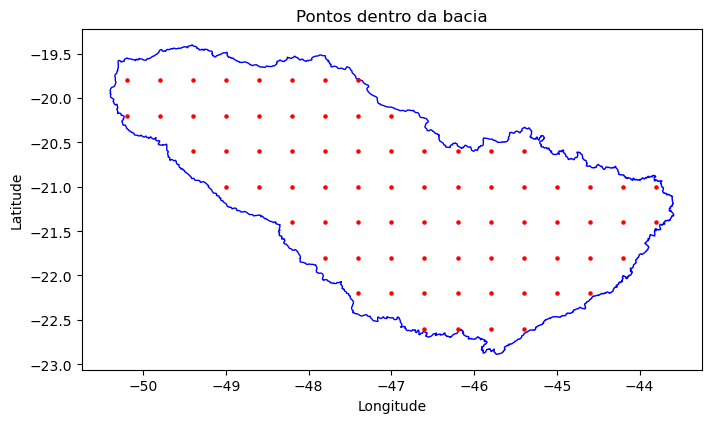

In [3]:
#### Calculando a precipitação média dos pontos da bacia ####

# Lendo o arquivo com o shapefile da bacia e o arquivo com os dados
bacia = gpd.read_file("GRANDE.shp")
df = pd.read_csv("MERGE_20250315-20250319.dat", sep="\s+", names=["longitude", "latitude", "precipitacao"])

# Convertendo de DataFrame para um GeoDataFrame
# Basicamente criando os pontos (uma lon e uma lat) que vão ser usados pra fazer a média e visualizados no final do script
gdf_pontos = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326") ## crs igual ao do shapefile ##

# Filtrar os pontos que estão dentro da bacia
pontos_na_bacia = gdf_pontos[gdf_pontos.geometry.within(bacia.union_all())]
print(pontos_na_bacia)

# Calculando a média dos pontos que estão dentro da bacia
media_precipitacao_bacia = pontos_na_bacia["precipitacao"].mean()
print(f"Precipitação média dentro da Bacia do Rio Grande: {media_precipitacao_bacia}")

# Criando figura, so pra visualizar os pontos, a media ja foi calculada acima
fig, ax = plt.subplots(figsize=(8, 6))
bacia.plot(ax=ax, color='none', edgecolor='blue', linewidth=1)
pontos_na_bacia.plot(ax=ax, color='red', markersize=5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Pontos dentro da bacia")
plt.show()
